<a href="https://colab.research.google.com/github/Devarsh-Patel/CECS-456-Machine-Learning-Project/blob/main/animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Kaggle

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Get dataset from an account. 

In [ ]:
! kaggle datasets download -d alessiocorrado99/animals10

 98% 573M/586M [00:03<00:00, 136MB/s]
100% 586M/586M [00:03<00:00, 157MB/s]


Unzipping all the dataset at Colab

In [ ]:
! unzip animals10.zip

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model 
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dropout
import keras

Gettting all the images in one file

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=True,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_datas = train_datagen.flow_from_directory(directory="/content/raw-img",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                                subset='training'
                                                )

validation_datas = test_datagen.flow_from_directory(directory="/content/raw-img",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               subset='validation')

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
train_datas.class_indices

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


train


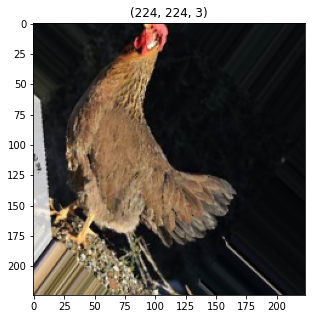

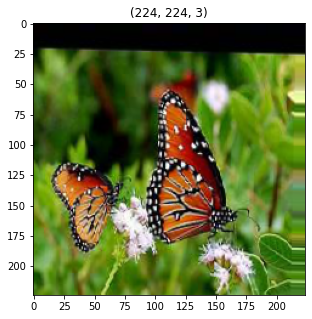

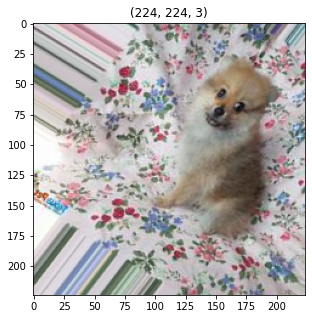

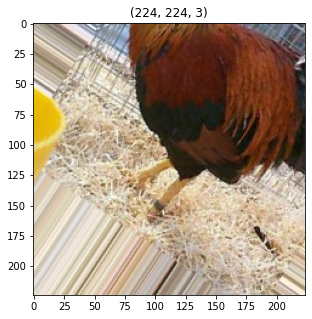

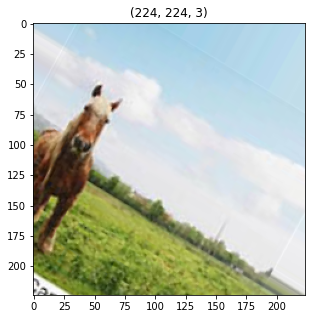

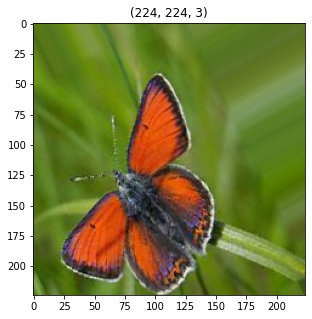

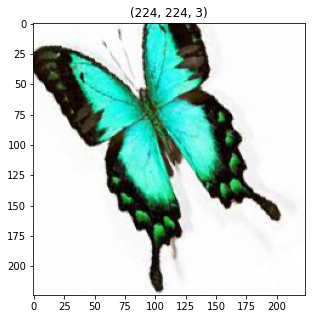

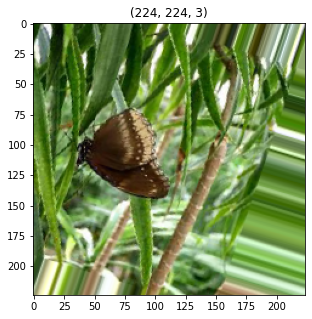

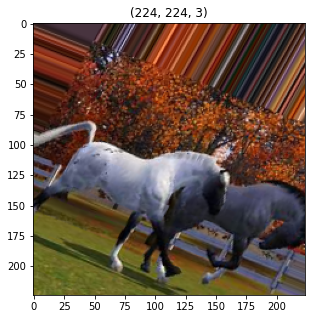

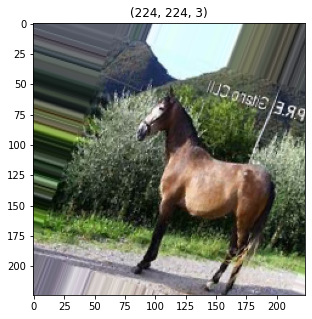

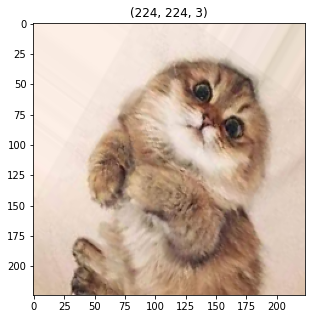

Validation


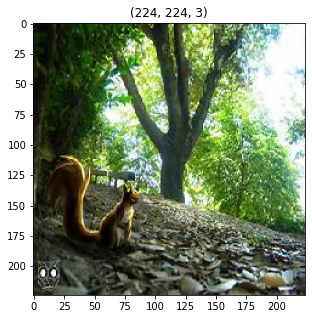

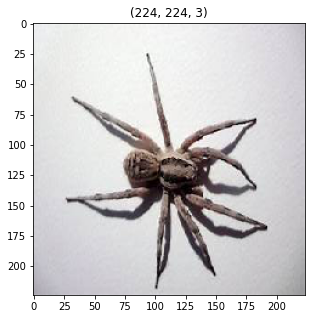

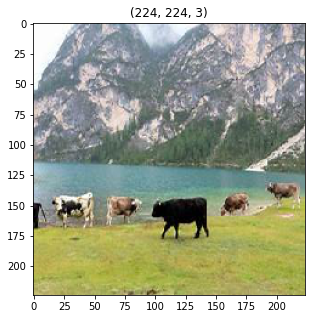

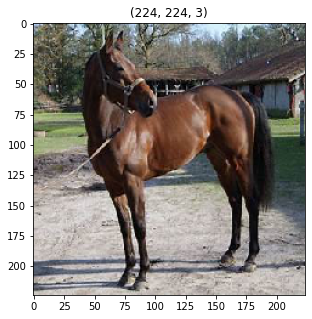

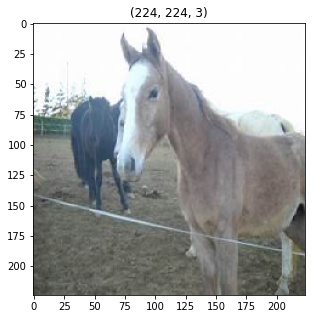

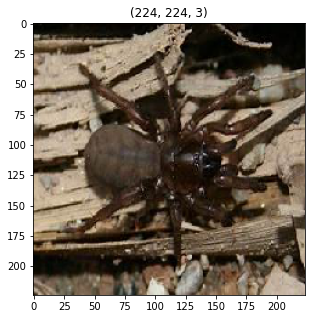

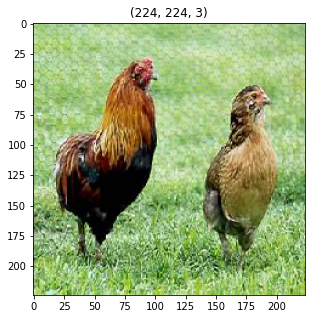

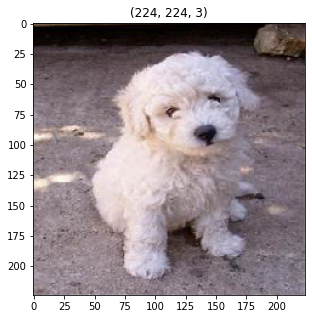

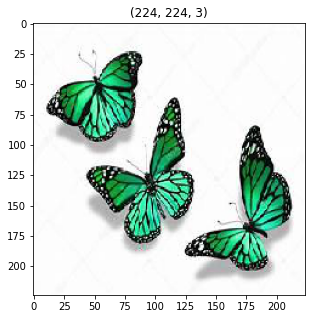

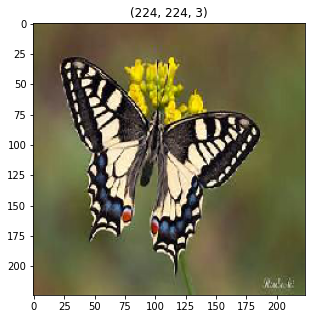

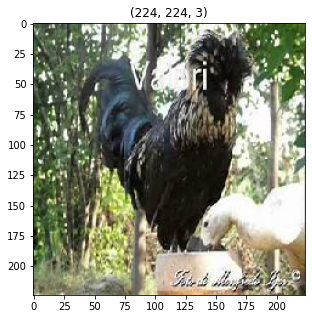

In [ ]:
t_img, labels = train_datas.next()
v_img, labels = validation_datas.next()

def plotImages(imgList, labels):
  for index, image in enumerate(imgList):

    if index <= 10:

      plt.figure(figsize=(5,5))
      plt.imshow(image)
      plt.title(image.shape)
      plt.axis = False
      plt.show()

print("train")
plotImages(t_img, labels)
print("Validation")
plotImages(v_img, labels)

In [ ]:
base_model = InceptionV3(input_shape=(224,224,3), include_top= False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras import optimizers

model = applications.VGG16(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

flat1 = tf.keras.layers.Flatten()(model.output)
dropout1 = Dropout(0.1)(flat1)
class1 = tf.keras.layers.Dense(256, activation='relu')(dropout1)
dropout2 = Dropout(0.1)(class1)
output = tf.keras.layers.Dense(10, activation='softmax')(dropout2)
model = Model(inputs = model.inputs, outputs = output)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-3, momentum=0.9), metrics = ['accuracy'])
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Modeling 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = ModelCheckpoint(filepath= "best_model.5h",
                                   monitor="val_loss",
                                   mode = 'min',
                                   save_best_only=True)
early_stopping = EarlyStopping (monitor= "val_loss",
                                min_delta = 0.0001,
                                patience = 5,
                                verbose = 1)

keras_callbacks = [model_checkpoint, early_stopping]


In [ ]:
history = model.fit(train_datas,
                    validation_data = validation_datas,
                    steps_per_epoch= 10,
                    epochs=30,
                    validation_steps = 10,
                    callbacks = keras_callbacks)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
10/10 [==============================] - 742s 76s/step - loss: 2.4421 - accuracy: 0.1719 - val_loss: 2.1534 - val_accuracy: 0.3219
Epoch 2/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 744s 76s/step - loss: 2.1998 - accuracy: 0.2344 - val_loss: 2.1523 - val_accuracy: 0.2250
Epoch 3/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 747s 76s/step - loss: 1.9551 - accuracy: 0.3219 - val_loss: 1.8302 - val_accuracy: 0.3688
Epoch 4/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 742s 76s/step - loss: 1.8923 - accuracy: 0.3688 - val_loss: 1.8268 - val_accuracy: 0.4000
Epoch 5/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 751s 77s/step - loss: 1.7908 - accuracy: 0.3969 - val_loss: 1.7868 - val_accuracy: 0.4031
Epoch 6/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 746s 76s/step - loss: 1.5689 - accuracy: 0.4688 - val_loss: 1.3171 - val_accuracy: 0.4906
Epoch 7/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 743s 76s/step - loss: 1.4497 - accuracy: 0.5219 - val_loss: 1.2573 - val_accuracy: 0.5594
Epoch 8/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 739s 76s/step - loss: 1.4186 - accuracy: 0.5031 - val_loss: 0.9406 - val_accuracy: 0.6687
Epoch 9/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 785s 81s/step - loss: 1.2554 - accuracy: 0.5406 - val_loss: 0.9622 - val_accuracy: 0.6656
Epoch 10/30
 2/10 [=====>........................] - ETA: 7:41 - loss: 1.2194 - accuracy: 0.6094

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.5h")

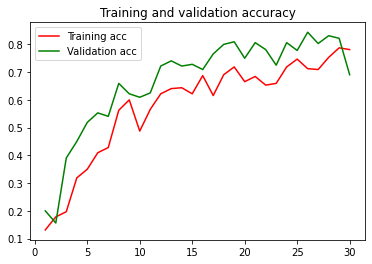

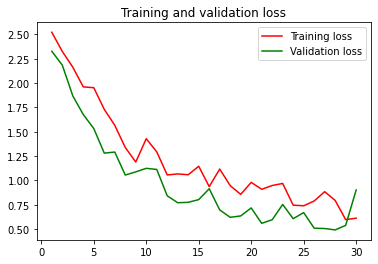

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()